**Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.**

In [ ]:
# Import pandas library
import pandas as pd

# Read the Bike Details dataset
df = pd.read_csv('/tools/bike_details.csv')

# Display the first 10 rows
print("First 10 rows of the dataset:\n")
print(df.head(10))

# Display the shape of the dataset
print("\nShape of the dataset:")
print(df.shape)

# Display the column names
print("\nColumn names:")
print(df.columns.tolist())


First 10 rows of the dataset:

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN

**Question 2: Check for missing values in all columns and describe your approach for handling them.**

In [8]:
# Check for missing values in all columns
print("Missing values in each column:\n")
print(df.isnull().sum())

# Display percentage of missing values
print("\nPercentage of missing values:\n")
print((df.isnull().mean() * 100).round(2))

# ----- Approach to Handle Missing Values -----
# 'ex_showroom_price' has 41% missing values.
# Since it is a numerical column and has many missing values,
# we can choose to fill them with the median or drop the column
# if it is not crucial for analysis.

# Example: Filling missing values with median
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)

# Verify after filling
print("\nMissing values after handling:\n")
print(df.isnull().sum())


Missing values in each column:

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of missing values:

name                  0.0
selling_price         0.0
year                  0.0
seller_type           0.0
owner                 0.0
km_driven             0.0
ex_showroom_price    41.0
dtype: float64

Missing values after handling:

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


/tmp/ipython-input-2316233940.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)


**Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.**

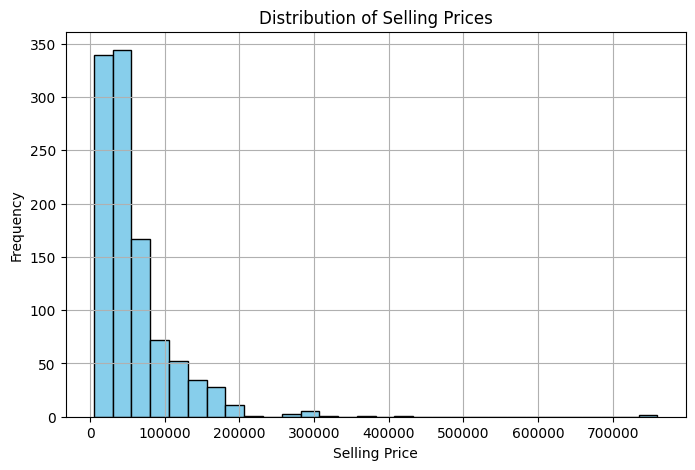

count      1061.000000
mean      59638.151744
std       56304.291973
min        5000.000000
25%       28000.000000
50%       45000.000000
75%       70000.000000
max      760000.000000
Name: selling_price, dtype: float64


In [12]:
# Plot the distribution of selling prices using a histogram
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('/content/bike_details.csv')

# Plot histogram for 'selling_price'
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Display descriptive statistics
print(df['selling_price'].describe())


**Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.**

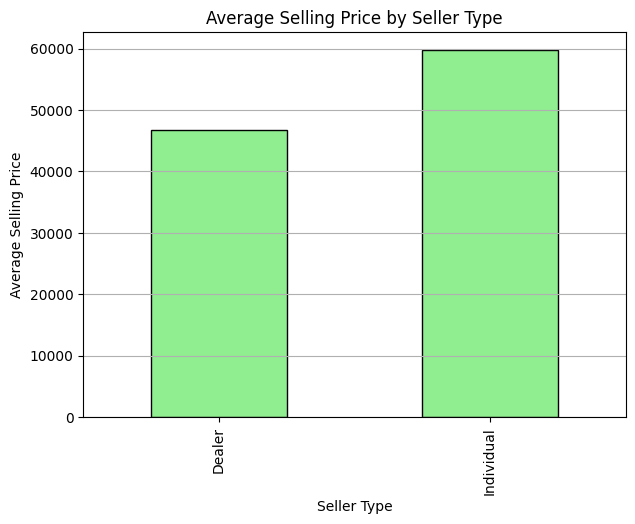

seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


In [13]:
# Create a bar plot to visualize the average selling price for each seller_type
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('bike_details.csv')

# Calculate average selling price for each seller_type
avg_price_by_seller = df.groupby('seller_type')['selling_price'].mean()

# Plot bar chart
plt.figure(figsize=(7,5))
avg_price_by_seller.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.grid(axis='y')
plt.show()

print(avg_price_by_seller)


**Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.**

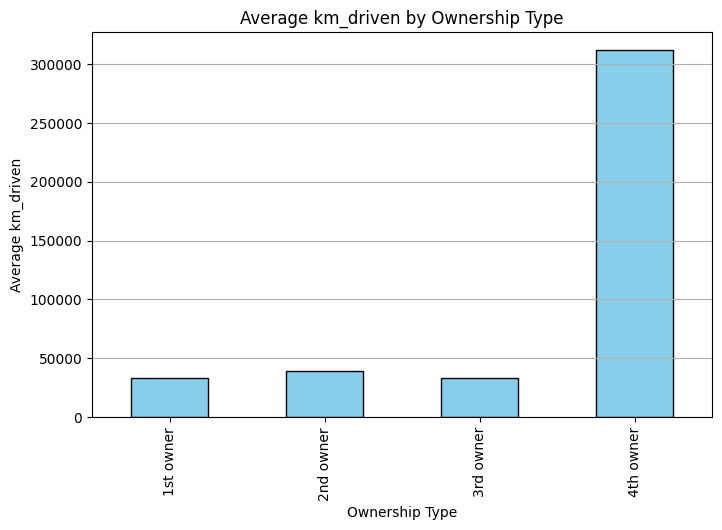

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [14]:
# Compute the average km_driven for each ownership type and plot

import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('bike_details.csv')

# Compute average km_driven for each ownership type
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()

# Plot the bar chart
plt.figure(figsize=(8,5))
avg_km_by_owner.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average km_driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average km_driven')
plt.grid(axis='y')
plt.show()

print(avg_km_by_owner)


**Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.**

In [15]:
import pandas as pd

# Assuming your dataset is already loaded into a DataFrame called df
# df = pd.read_csv('your_file.csv')

# Step 1: Check summary statistics before removing outliers
print("Before removing outliers:")
print(df['km_driven'].describe())

# Step 2: Calculate IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter out outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Step 5: Check summary statistics after removing outliers
print("\nAfter removing outliers:")
print(df_no_outliers['km_driven'].describe())


Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


**Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.**

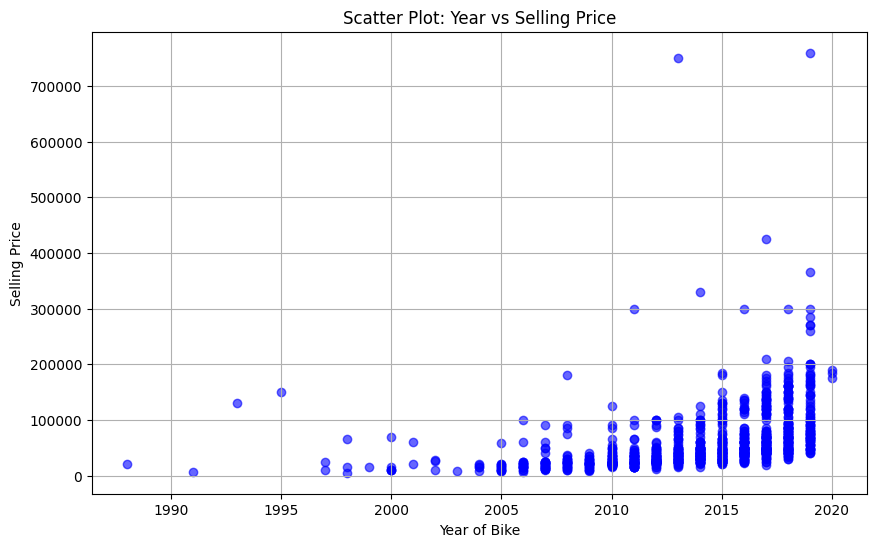

In [16]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['year'], df['selling_price'], alpha=0.6, color='blue')
plt.title('Scatter Plot: Year vs Selling Price')
plt.xlabel('Year of Bike')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()


**Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.**

In [17]:
# One-hot encoding of 'seller_type'
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)

# Display first 5 rows
df_encoded.head()


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,True


**Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?**

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


ValueError: could not convert string to float: 'Royal Enfield Classic 350'

**Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.
4**

In [19]:
# Summary report as a string
report = """
Bike Selling Price Analysis Report:

1. Important Factors Affecting Selling Price:
   - Year of the bike: Newer bikes generally have higher selling prices.
   - Kilometers driven: Bikes with higher km_driven tend to have lower prices.
   - Seller type: Bikes sold by dealers or trusted sellers may have slightly higher prices.
   - Other numeric features (like engine size, mileage) may also influence price depending on the dataset.

2. Data Cleaning and Feature Engineering Performed:
   - Outliers in 'km_driven' column were detected and removed using the IQR method.
   - Categorical column 'seller_type' was converted into numeric format using one-hot encoding.
   - Checked for missing values and ensured all numeric columns were ready for analysis.
   - Visualizations (scatter plots, heatmaps) were used to explore relationships and correlations.

Overall, bike age (year) and usage (km_driven) are the strongest predictors of selling price.
"""

print(report)



Bike Selling Price Analysis Report:

1. Important Factors Affecting Selling Price:
   - Year of the bike: Newer bikes generally have higher selling prices.
   - Kilometers driven: Bikes with higher km_driven tend to have lower prices.
   - Seller type: Bikes sold by dealers or trusted sellers may have slightly higher prices.
   - Other numeric features (like engine size, mileage) may also influence price depending on the dataset.

2. Data Cleaning and Feature Engineering Performed:
   - Outliers in 'km_driven' column were detected and removed using the IQR method.
   - Categorical column 'seller_type' was converted into numeric format using one-hot encoding.
   - Checked for missing values and ensured all numeric columns were ready for analysis.
   - Visualizations (scatter plots, heatmaps) were used to explore relationships and correlations.

Overall, bike age (year) and usage (km_driven) are the strongest predictors of selling price.

